In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


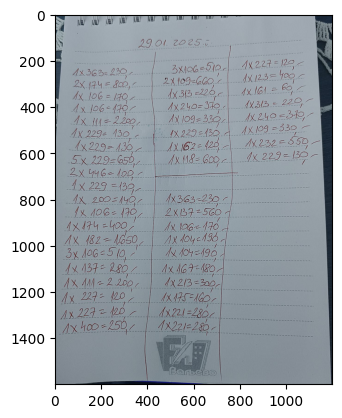

In [10]:
# Učitavanje slike
image = cv2.imread("slika.jpg")

# Primena filtera za povećanje oštrine
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel)

plt.imshow(sharpened)

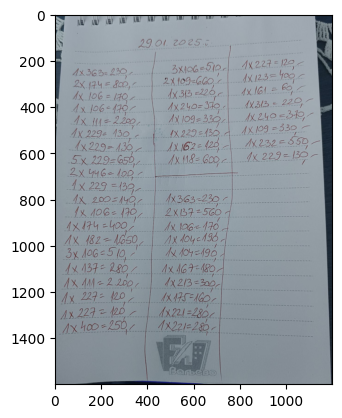

In [11]:
# Uklanjanje šuma korišćenjem Gaussian Blur
denoised = cv2.GaussianBlur(sharpened, (5, 5), 0)
plt.imshow(denoised)

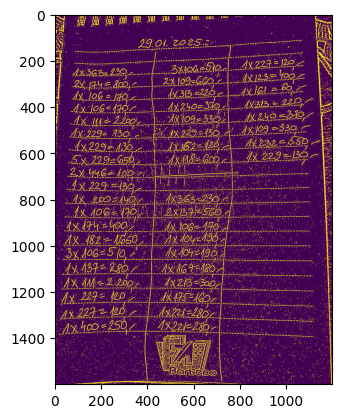

In [12]:
gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)
plt.imshow(thresh)

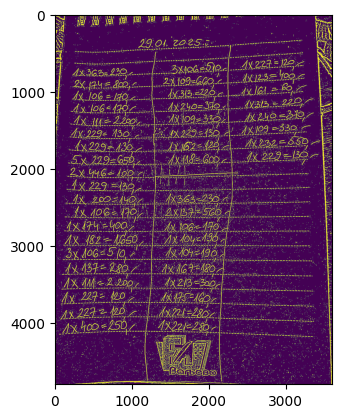

In [18]:
# Povećanje rezolucije

scaled_image = cv2.resize(thresh, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
plt.imshow(scaled_image)

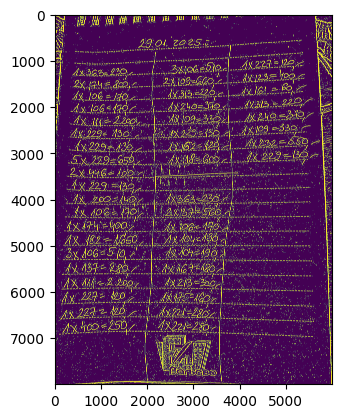

In [19]:
scaled_image = cv2.resize(thresh, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
plt.imshow(scaled_image)

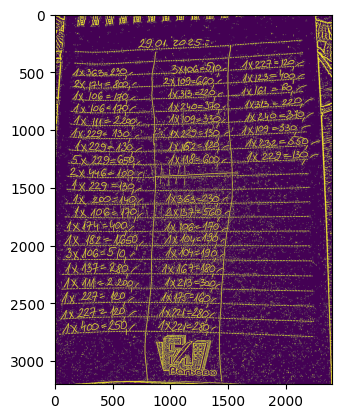

In [14]:
# Podešavanje kontrasta i osvetljenja
alpha = 1.5  # Kontrast
beta = 30    # Osvetljenje
adjusted = cv2.convertScaleAbs(scaled_image, alpha=alpha, beta=beta)
plt.imshow(adjusted)

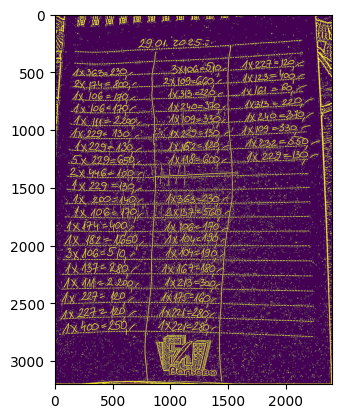

In [15]:
# Detekcija i uklanjanje horizontalnih linija
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
detect_horizontal = cv2.morphologyEx(adjusted, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

for c in cnts:
    cv2.drawContours(adjusted, [c], -1, (255, 255, 255), 5)

plt.imshow(adjusted)

In [17]:
import easyocr
reader = easyocr.Reader(["en"])
text = reader.readtext(adjusted, detail=0)

print("Prepoznat tekst:", text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Prepoznat tekst: ['A8K', 'pl', 'J8', '"Ii7', 'Jai Ma;', 'J;,', '2904', 'ZD2s', '[x221', '122', '4x363-23', '3x106-5', "'2x.4iy #,802,", '2Alog-6Cc', '{xi23', '6o', 'Kxlo6 =', 'Ix3/3', '39', 'Ax I6l', 'Ax2y0-3j2', 'AX313.', 'AX 44', 'Ax', 'Og', 'Ax2y', '229', '229', 'Xiog _339', '[x232285', '43', 'Xij62', '22', 'AxM8', 'Go', 'X229=13', '2 Xly', '4x229=133', 'Ax363', '220', "'Ao", 'Ax [321', '560', 'AxIru', 'Ax 1o6r41o', 'Ax 182', '46', 'X Iou-A9', "'Aoo:", '5', '0', '1oyeIg', '4x431 ', 'Ax A62z4', 'Am', '2200', '4x213', '[x.22}', '120', 'Ax475ado', 'Ax221', '28o', '2.5', 'loo', "'A30", '5X', '3X', '020', '4x22L', 'Ax2zl', 'Axhco', '280']
